In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Load the dataset
df = pd.read_csv("../data/cleaned_GenZ_DatingApp_Data.csv")

<Figure size 800x500 with 0 Axes>

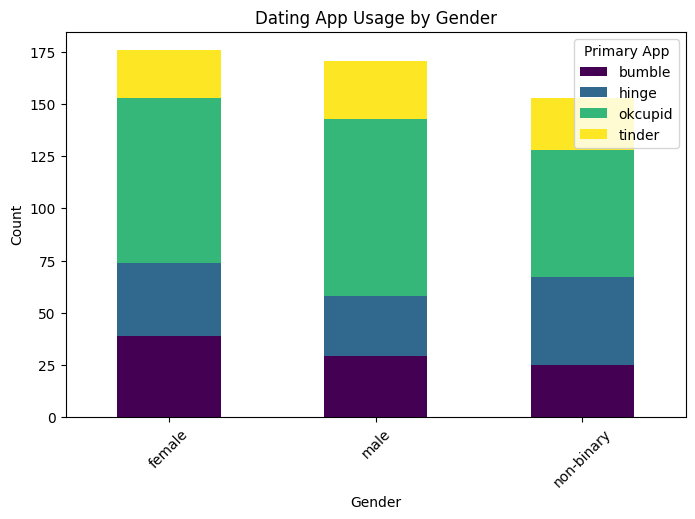

Chi-square Test: χ²=8.83, p-value=0.18336


In [66]:
# Stacked bar chart: Dating app usage by gender
plt.figure(figsize=(8, 5))
app_by_gender = df.groupby(['Gender', 'Primary_App']).size().unstack()
app_by_gender.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 5))
plt.title("Dating App Usage by Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Primary App")
plt.show()

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(app_by_gender.fillna(0))
print(f"Chi-square Test: χ²={chi2:.2f}, p-value={p:.5f}")


<Axes: xlabel='Secondary_Apps', ylabel='count'>

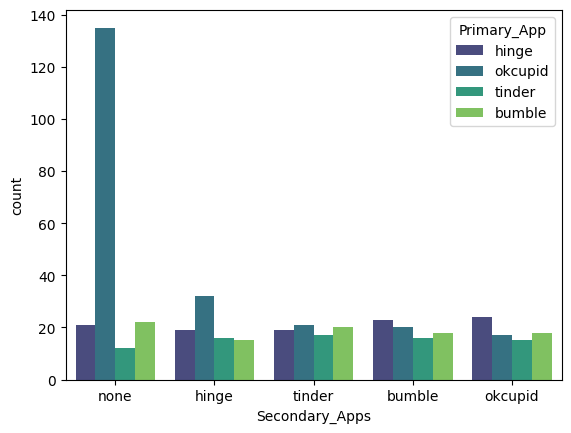

In [67]:
sns.countplot(data=df, x='Secondary_Apps', order=df['Secondary_Apps'].value_counts().index, palette='viridis', hue='Primary_App')

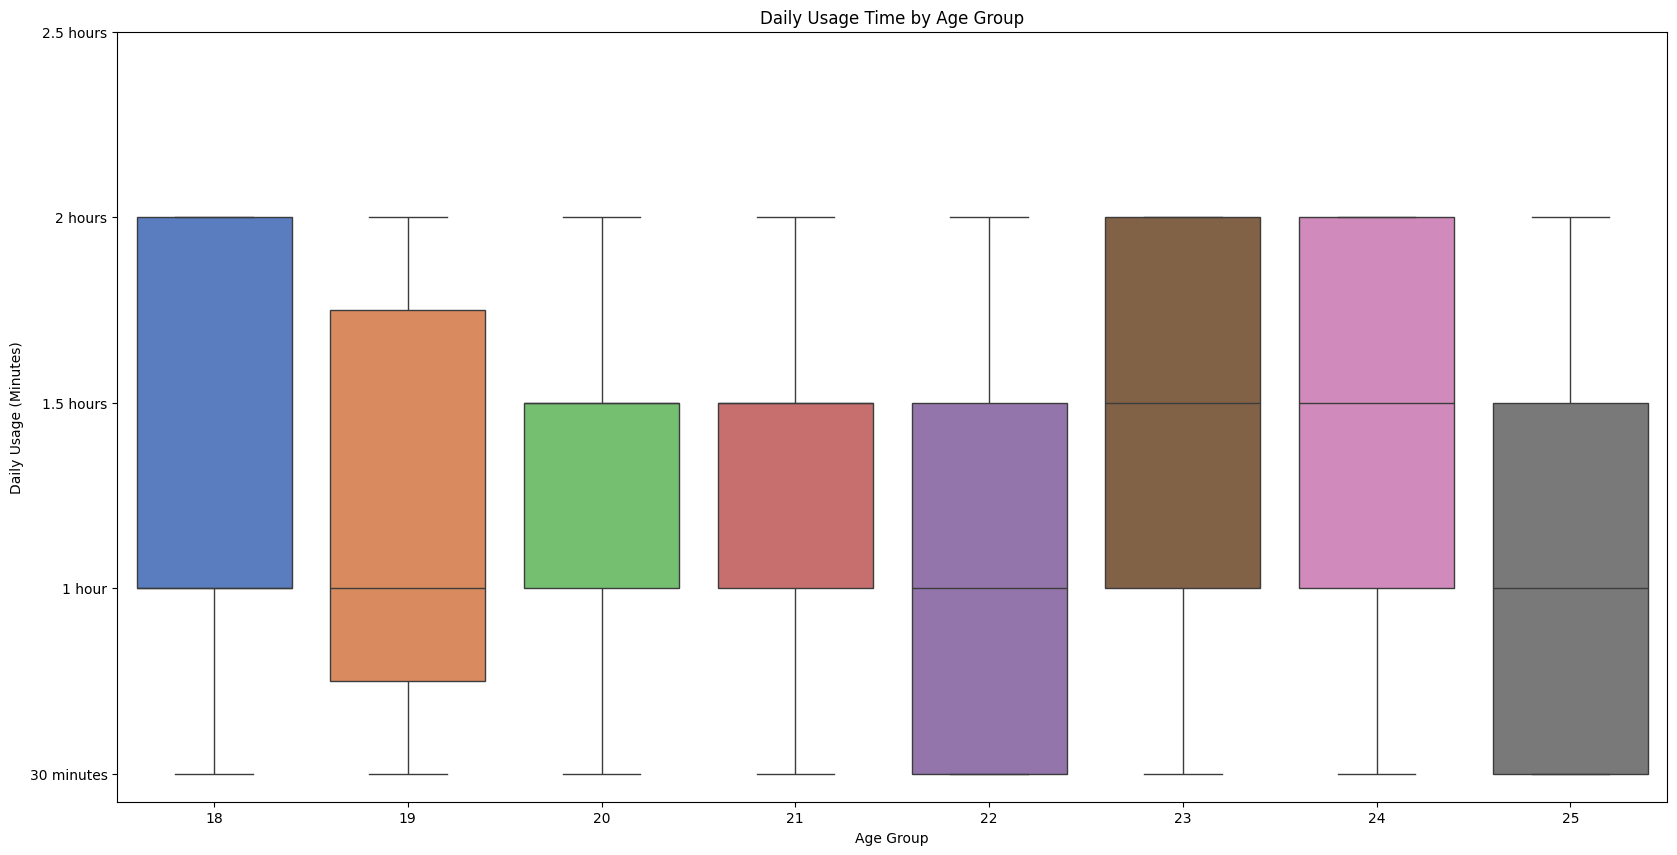

In [68]:
# Define age groups
bins = [18, 19, 20, 21, 22, 23, 24, 25, 26]
labels = ['18', '19', '20', '21', '22', '23', '24', '25']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Convert 'Daily_Usage_Time' to minutes if it's in string format like "1 hour 30 mins"
time_map = {
    "30 minutes": 30,
    "1 hour": 60,
    "1.5 hours": 90,
    "2 hours": 120,
    "2.5 hours": 150
}
df['Daily_Usage_Time'] = df['Daily_Usage_Time'].map(time_map)

# Plot average daily usage time per age group
plt.figure(figsize=(20, 10))
sns.boxplot(x='Age_Group', y='Daily_Usage_Time', data=df, palette='muted', hue='Age', legend=False)

# Set custom y-axis labels
plt.yticks([30, 60, 90, 120, 150], ['30 minutes', '1 hour', '1.5 hours', '2 hours', '2.5 hours'])

plt.title("Daily Usage Time by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Daily Usage (Minutes)")
plt.show()


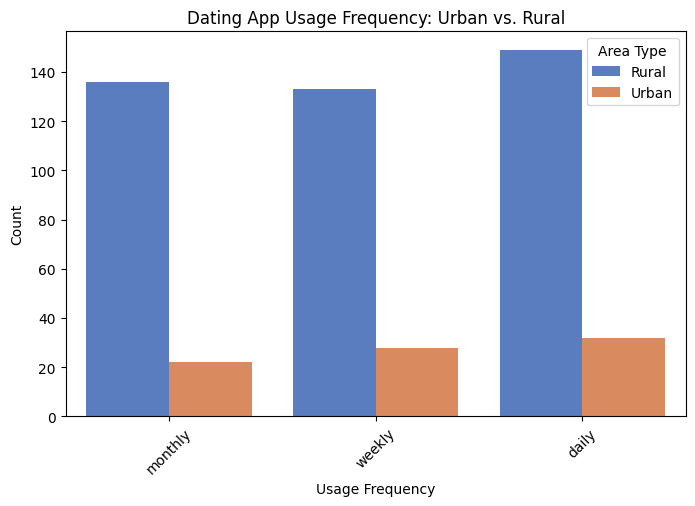

In [69]:
# Manually classify urban vs rural locations (urban are: dehli, mumbai)
urban_locations = ["dehli", "mumbai"]
df['Area_Type'] = df['Location'].apply(lambda x: 'Urban' if x in urban_locations else 'Rural')

# Compare usage frequency
plt.figure(figsize=(8, 5))
sns.countplot(x='Usage_Frequency', hue='Area_Type', data=df, palette='muted')
plt.title("Dating App Usage Frequency: Urban vs. Rural")
plt.xlabel("Usage Frequency")
plt.ylabel("Count")
plt.legend(title="Area Type")
plt.xticks(rotation=45)
plt.show()


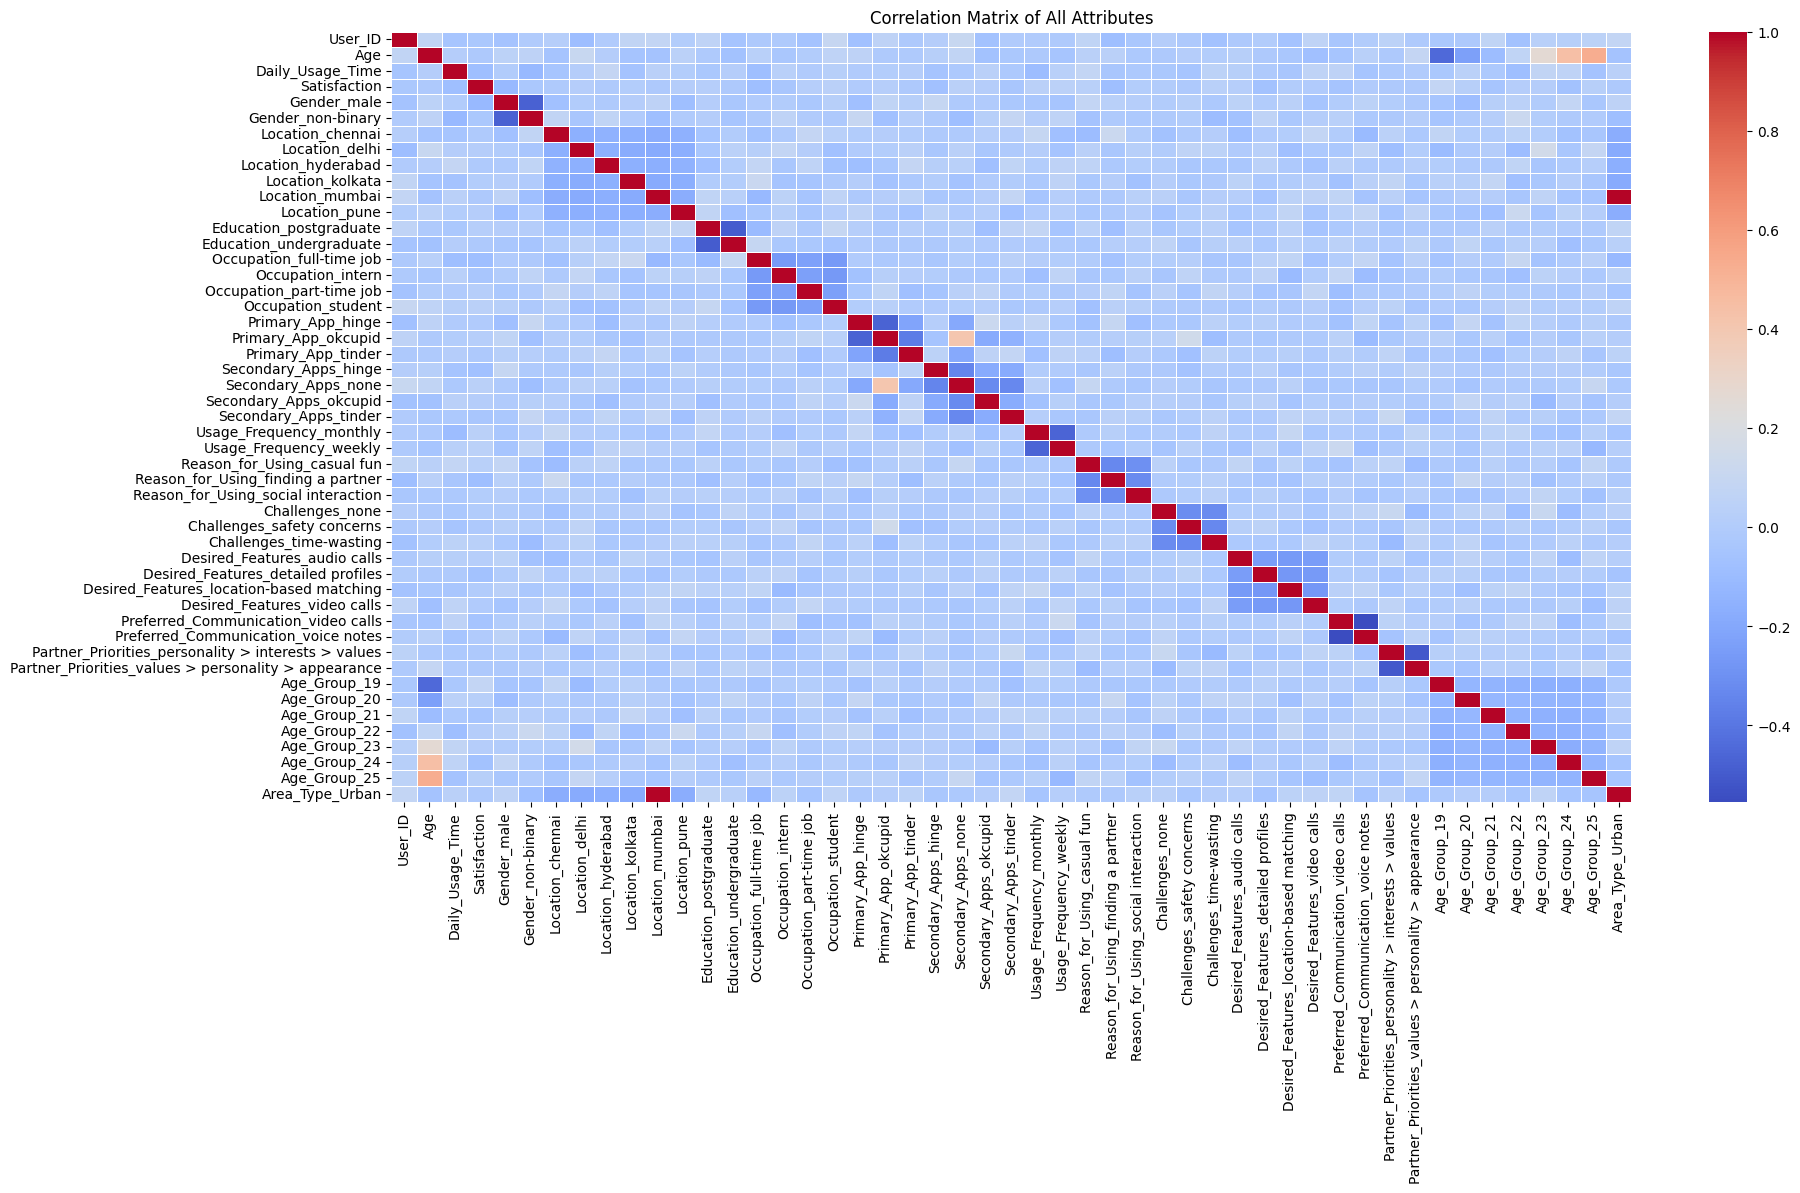

In [70]:
# Convert categorical attributes into numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of All Attributes")
plt.show()

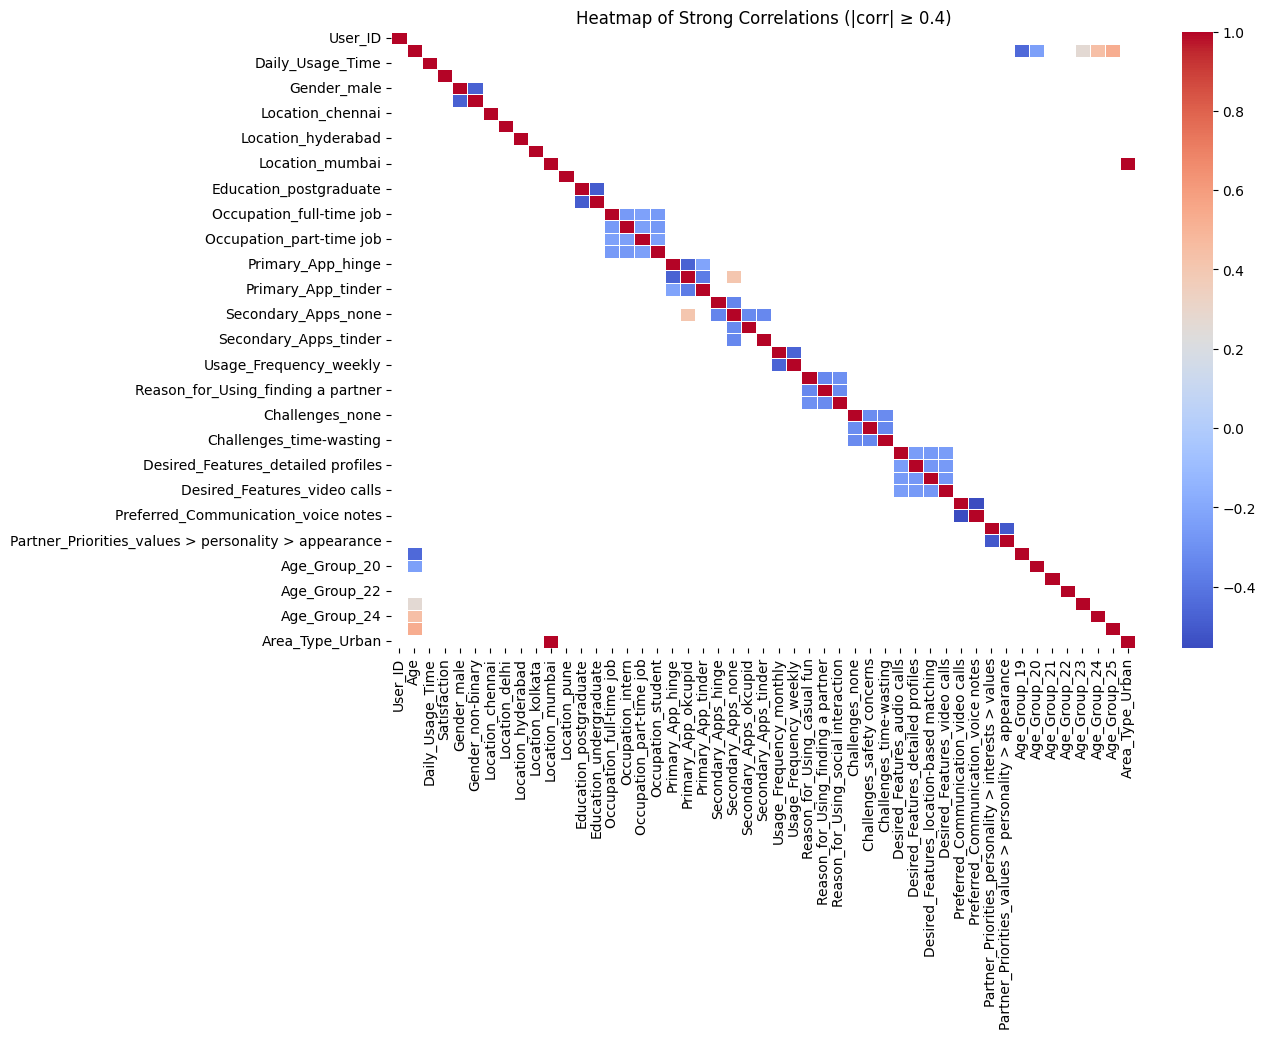

In [71]:
# Filter correlations with |corr| >= 0.4
strong_corr = corr_matrix[abs(corr_matrix) >= 0.2]

# Plot heatmap for strong correlations
plt.figure(figsize=(12, 8))
sns.heatmap(strong_corr, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, mask=strong_corr.isnull())
plt.title("Heatmap of Strong Correlations (|corr| ≥ 0.4)")
plt.show()

In [ ]:
# Pivot Tables & Groupby Aggregations
pivot_gender = df.pivot_table(index='Gender', values=['Age', 'Satisfaction'], aggfunc=np.mean)
print("\nPivot Table by Gender:")
print(pivot_gender)

pivot_location = df.groupby('Location').agg({'Age': 'mean', 'Satisfaction': 'mean'})
print("\nAggregated Data by Location:")
print(pivot_location)

pivot_app = df.groupby('Primary_App').agg({'Age': 'mean', 'Satisfaction': 'mean'})
print("\nAggregated Data by Location:")
print(pivot_app)


Pivot Table by Gender:
                  Age  Satisfaction
Gender                             
female      21.261364      3.176136
male        21.736842      2.678363
non-binary  21.777778      2.849673

Aggregated Data by Location:
                 Age  Satisfaction
Location                          
bangalore  21.623188      2.898551
chennai    21.272727      2.863636
delhi      22.131579      2.960526
hyderabad  21.671875      2.875000
kolkata    21.302632      2.934211
mumbai     21.280488      2.853659
pune       21.820896      2.955224


C:\Users\daryl\AppData\Local\Temp\ipykernel_5376\2350916286.py:2: FutureWarning: The provided callable <function mean at 0x000002287A67A980> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_gender = df.pivot_table(index='Gender', values=['Age', 'Satisfaction'], aggfunc=np.mean)


<Figure size 800x500 with 0 Axes>

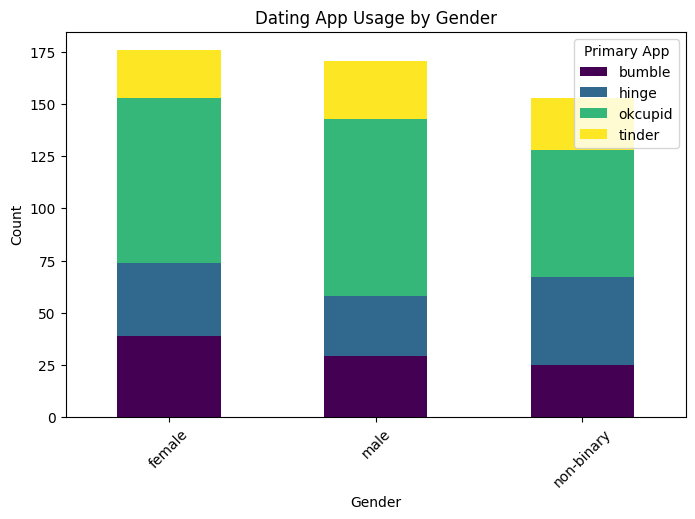

In [73]:
# Stacked Bar Chart: Dating App Usage by Gender
plt.figure(figsize=(8, 5))
dating_app_counts = df.groupby(['Gender', 'Primary_App']).size().unstack()
dating_app_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8, 5))
plt.title("Dating App Usage by Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Primary App")
plt.show()